In [143]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [144]:
df = pd.read_csv('db_jardin.csv')
df.columns

Index(['Unnamed: 0', 'Especie Vegetal ', 'Fecha', 'Sp Entomológica ',
       'No. Individuos ', 'Suelo', 'Hojas', 'Hojas Ramas', 'Fruto',
       'Tallo Ramas', 'Tallo Hojas', 'Vuelo', 'Vuelo Hojas',
       'Vegetacion Aledaña', 'Flor Fruto', 'Vegetacion Tallo', 'Flor',
       'Tronco', 'Vuelo Fruto', 'Vuelo Vegetacion ', 'Sustrato '],
      dtype='object')

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6540 entries, 0 to 6539
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          6540 non-null   int64  
 1   Especie Vegetal     6540 non-null   object 
 2   Fecha               6500 non-null   object 
 3   Sp Entomológica     5400 non-null   object 
 4   No. Individuos      5370 non-null   float64
 5   Suelo               700 non-null    object 
 6   Hojas               720 non-null    object 
 7   Hojas Ramas         1270 non-null   object 
 8   Fruto               20 non-null     object 
 9   Tallo Ramas         300 non-null    object 
 10  Tallo Hojas         10 non-null     object 
 11  Vuelo               130 non-null    object 
 12  Vuelo Hojas         20 non-null     object 
 13  Vegetacion Aledaña  1200 non-null   object 
 14  Flor Fruto          90 non-null     object 
 15  Vegetacion Tallo    30 non-null     object 
 16  Flor  

In [146]:
df['Fecha'].tolist()[0]

'2023-10-16'

In [147]:
# display(df.loc[(df['Sp Entomológica '].str.contains('o')) | (df['Sp Entomológica '].str.contains('ó')), 'Sp Entomológica '])
df['Sp Entomológica '] = df['Sp Entomológica '].astype(str)
df = df.loc[~(df['Sp Entomológica '].str.contains('o')) & ~(df['Sp Entomológica '].str.contains('ó'))]
df = df.loc[(df['Sp Entomológica '] != 'nan')]
df['Fecha'] = pd.to_datetime(df['Fecha'])
df = df.loc[df['Fecha'].dt.year != 2023]
df = df.sort_values(by='Fecha')

In [148]:
df = df.loc[(df['Sp Entomológica '].str.contains('Sp'))]
df.head()


,Unnamed: 0,Especie Vegetal,Fecha,Sp Entomológica,No. Individuos,Suelo,Hojas,Hojas Ramas,Fruto,Tallo Ramas,...,Vuelo,Vuelo Hojas,Vegetacion Aledaña,Flor Fruto,Vegetacion Tallo,Flor,Tronco,Vuelo Fruto,Vuelo Vegetacion,Sustrato
1594,1594,Quercus autopista,2021-10-17,Sp55,1.0,NaN,si,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hojas
2872,2872,Rhus standleyi,2021-10-17,Sp6,1.0,NaN,si,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hojas
2873,2873,Rhus standleyi,2021-10-17,Sp122,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,si,NaN,NaN,NaN,NaN,NaN,Flor Fruto
2874,2874,Rhus standleyi,2021-10-17,Sp123,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,si,NaN,NaN,NaN,NaN,NaN,Flor Fruto
2875,2875,Rhus standleyi,2021-10-17,Sp70,25.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,si,NaN,NaN,NaN,NaN,NaN,NaN,Vegetación Aledaña


In [149]:
print('número de especies unicas vegetales ', len(df['Especie Vegetal '].unique()))
print('número de especies unicas ', len(df['Sp Entomológica '].unique()))
print('número de entradas', len(df))
print('total de individuos', df['No. Individuos '].sum())

número de especies unicas vegetales  43
número de especies unicas  206
número de entradas 5180
total de individuos 13880.0


In [150]:
df = df.loc[~(df['Fecha'].isna())]

In [151]:
# conteo de especies
conte_sp = df.groupby('Sp Entomológica ').sum().sort_values(by='No. Individuos ', ascending=False)
conte_sp = conte_sp.reset_index()
conte_sp.head(8)

/var/folders/tp/3mtqlk4s23vgyrhg80xv4lyc0000gn/T/ipykernel_26872/3577074896.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  conte_sp = df.groupby('Sp Entomológica ').sum().sort_values(by='No. Individuos ', ascending=False)


,Sp Entomológica,Unnamed: 0,No. Individuos
0,Sp3,1923740,3830.0
1,Sp4,457470,870.0
2,Sp2,371690,590.0
3,Sp1,643830,560.0
4,Sp70,324730,550.0
5,Sp136,64950,500.0
6,Sp77,236850,430.0
7,Sp43,385280,300.0


In [152]:

print(conte_sp['No. Individuos '].sum())
print(conte_sp['No. Individuos '].mean())
print(conte_sp['No. Individuos '].std())
conte_sp.loc[conte_sp['No. Individuos '] <= 6].info()

13880.0
67.37864077669903
283.3044080827534
<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sp Entomológica   0 non-null      object 
 1   Unnamed: 0        0 non-null      int64  
 2   No. Individuos    0 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 0.0+ bytes


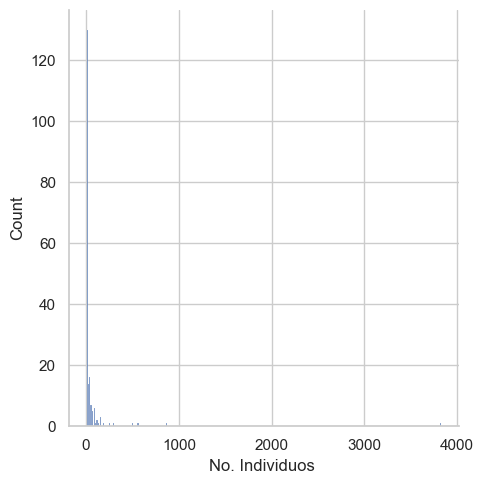

In [153]:
sns.displot(conte_sp['No. Individuos '])

In [154]:
conte_sp.loc[conte_sp['No. Individuos '] >= (conte_sp['No. Individuos '].mean() + 
                                             conte_sp['No. Individuos '].std()), 'Sp Entomológica ']

0      Sp3
1      Sp4
2      Sp2
3      Sp1
4     Sp70
5    Sp136
6     Sp77
Name: Sp Entomológica , dtype: object

In [155]:
len(conte_sp.loc[(conte_sp['No. Individuos '] < (conte_sp['No. Individuos '].mean() + conte_sp['No. Individuos '].std()))
             & (conte_sp['No. Individuos '] > conte_sp['No. Individuos '].mean() )])

25

In [156]:
conte_sp.loc[(conte_sp['No. Individuos '] < (conte_sp['No. Individuos '].mean() + conte_sp['No. Individuos '].std()))
             & (conte_sp['No. Individuos '] > conte_sp['No. Individuos '].mean() )]

,Sp Entomológica,Unnamed: 0,No. Individuos
7,Sp43,385280,300.0
8,Sp9,355700,250.0
9,Sp44,194570,190.0
10,Sp80,30900,160.0
11,Sp89,64330,160.0
12,Sp131,132750,160.0
13,Sp140,200670,140.0
14,Sp76,320450,130.0
15,Sp66,197940,130.0
16,Sp6,294030,120.0


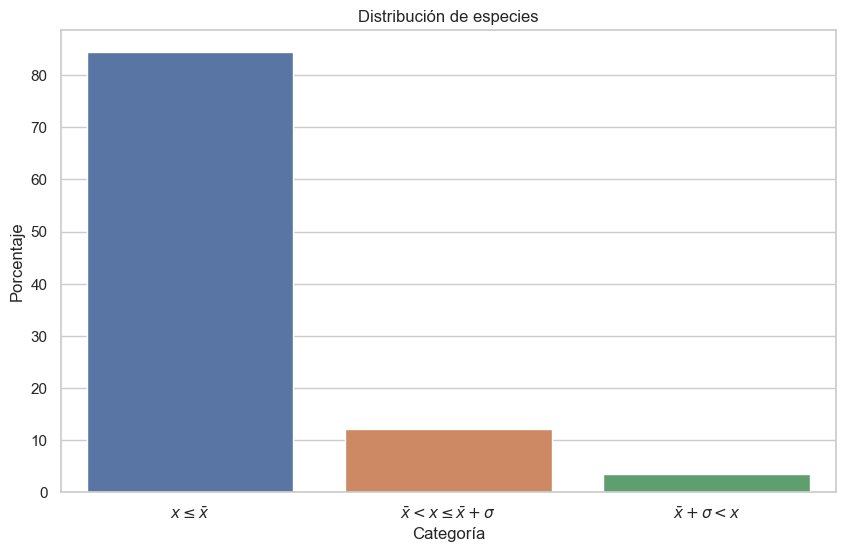

In [157]:
data = {
    'Categoría': [r'$x \leq \bar{x}$', r'$\bar{x} < x \leq \bar{x} + \sigma$' , r'$\bar{x} + \sigma < x$ '],
    'Porcentaje': [84.46, 12.13, 3.39]
}

df_dis = pd.DataFrame(data)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='Categoría', y='Porcentaje', data=df_dis)
plt.title('Distribución de especies')
plt.xlabel('Categoría')
plt.ylabel('Porcentaje')
plt.show()

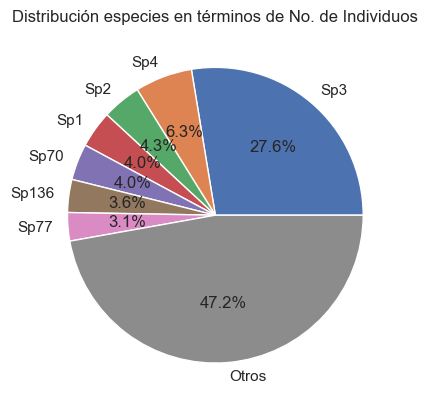

In [158]:
# creacion de la grafica de pastel
top_5 = conte_sp.iloc[:7]
otros = pd.DataFrame({'Sp Entomológica ': 'otros', 'No. Individuos ': [conte_sp.iloc[7:]['No. Individuos '].sum()]})
new_df = pd.concat([top_5, otros])

# Creamos una nueva columna que refleje la agrupación de los datos
new_df['agrupacion'] = new_df['Sp Entomológica ']
new_df.loc[new_df['Sp Entomológica '].isin(top_5['Sp Entomológica '].tolist()) == False, 'agrupacion'] = 'Otros'
# Creamos la gráfica de pastel utilizando la nueva columna agrupacion
plt.pie(new_df['No. Individuos '], labels=new_df['agrupacion'], autopct='%1.1f%%')
plt.title('Distribución especies en términos de No. de Individuos')
plt.show()

In [159]:
# Convertimos la columna fecha en un objeto datetime
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Creamos una nueva columna con el mes de cada fecha
df['mes'] = df['Fecha'].dt.month

# Agrupamos el DataFrame por la nueva columna de mes y contamos el número de ocurrencias en cada mes


In [160]:
type(df['mes'].tolist()[0])

int

In [161]:
import calendar
# Crear un diccionario para mapear los números de mes a los nombres en español
meses_espanol = {i: calendar.month_name[i] for i in range(1, 13)}

# Mapear los números de mes a los nombres de los meses en español
df['mes'] = df['mes'].map(meses_espanol)

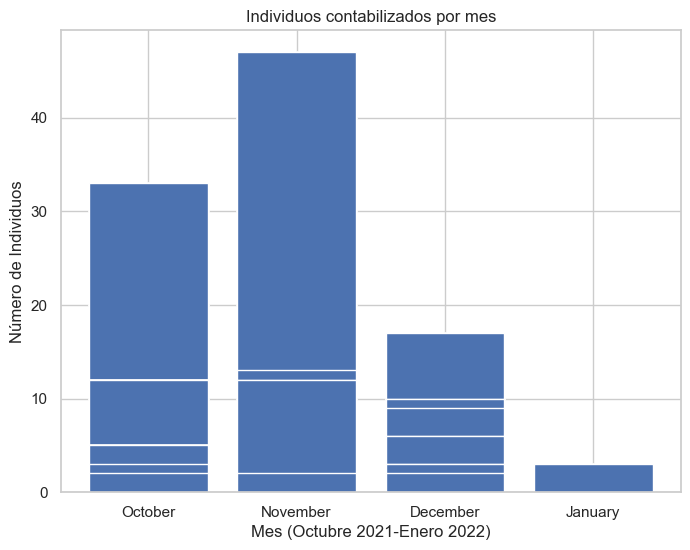

In [162]:
# Establecer el tamaño de la figura
plt.figure(figsize=(8, 6))

# Crear la gráfica de barras
plt.bar(df['mes'], df['No. Individuos '])

# Agregar etiquetas y títulos
plt.xlabel('Mes (Octubre 2021-Enero 2022)')
plt.ylabel('Número de Individuos')
plt.title('Individuos contabilizados por mes')

# Mostrar la gráfica
plt.show()

In [163]:
len(df.loc[df['Sp Entomológica '] == 'Sp3'])


600

In [164]:
mean_sp3 = df.loc[df['Sp Entomológica '] == 'Sp3', 'No. Individuos '].mean()
std_sp3 = df.loc[df['Sp Entomológica '] == 'Sp3', 'No. Individuos '].std()
print('promedio de individuos encontrados sp3', mean_sp3)
print('std de individuos encontrados sp3', std_sp3)

promedio de individuos encontrados sp3 6.603448275862069
std de individuos encontrados sp3 4.346557429883461


In [165]:
print('casos en lo que se encontraron pocos sp3', len(df.loc[(df['Sp Entomológica '] == 'Sp3') & (df['No. Individuos '] < mean_sp3 - std_sp3)]))
print('casos en lo que se encontraron muchos sp3', len(df.loc[(df['Sp Entomológica '] == 'Sp3') & (df['No. Individuos '] > mean_sp3 + std_sp3)]))

casos en lo que se encontraron pocos sp3 100
casos en lo que se encontraron muchos sp3 110


In [166]:
sp3_encuentros = pd.DataFrame(df.loc[df['Sp Entomológica '] == 'Sp3', 'No. Individuos '].value_counts()).reset_index()
sp3_encuentros = sp3_encuentros.rename(columns={'index': 'No. Individuos', 'No. Individuos ': 'Casos'})
sp3_encuentros.sort_values(by='No. Individuos')

,No. Individuos,Casos
8,1.0,30
2,2.0,70
1,3.0,70
0,4.0,110
5,5.0,40
13,6.0,10
10,7.0,20
9,8.0,20
4,9.0,50
3,10.0,50


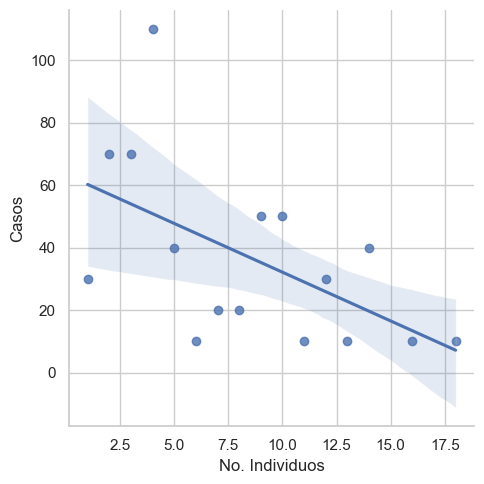

In [167]:
sns.lmplot(data=sp3_encuentros, y='Casos', x='No. Individuos')

<Axes: xlabel='No. Individuos', ylabel='Casos'>

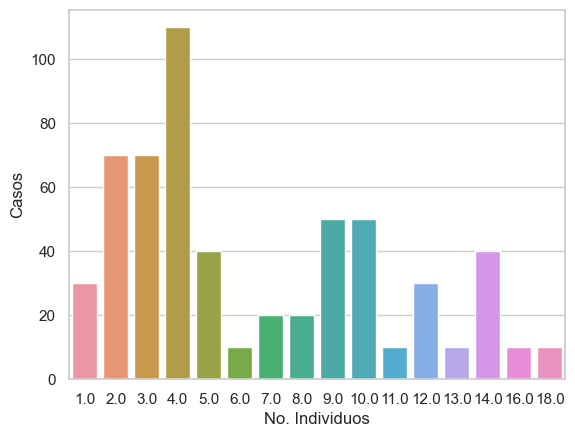

In [168]:
sns.barplot(data=sp3_encuentros, x='No. Individuos', y='Casos')

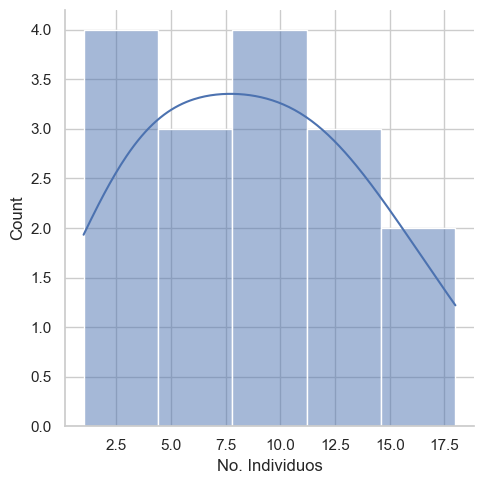

In [169]:
sns.displot(sp3_encuentros['No. Individuos'], kde=True)


In [170]:
sp3 = df.loc[df['Sp Entomológica '] == 'Sp3']
sp3 = sp3.set_index('Fecha')
sp3.head()

,Unnamed: 0,Especie Vegetal,Sp Entomológica,No. Individuos,Suelo,Hojas,Hojas Ramas,Fruto,Tallo Ramas,Tallo Hojas,...,Vuelo Hojas,Vegetacion Aledaña,Flor Fruto,Vegetacion Tallo,Flor,Tronco,Vuelo Fruto,Vuelo Vegetacion,Sustrato,mes
Fecha,,,,,,,,,,,,,,,,,,,,,
2021-10-17,2869,Rhus standleyi,Sp3,10.0,NaN,si,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hojas,October
2021-10-17,2868,Rhus standleyi,Sp3,12.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,si,NaN,NaN,NaN,NaN,NaN,NaN,Vegetación Aledaña,October
2021-10-17,2863,Quercus invaginata,Sp3,10.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,si,NaN,NaN,NaN,NaN,NaN,NaN,Vegetación Aledaña,October
2021-10-17,2864,Quercus invaginata,Sp3,10.0,NaN,NaN,NaN,NaN,si,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tallo Ramas,October
2021-10-17,2865,Quercus invaginata,Sp3,5.0,NaN,si,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hojas,October


In [171]:
pd.DataFrame(df.loc[df['Sp Entomológica '] == 'Sp3', 'Especie Vegetal '].value_counts())

,Especie Vegetal
Quercus sebifera,30
Quercus polymorpha,30
Quercus rotundifolia,30
Quercus mexicana,30
Quercus invaginata,30
Ipomea murucoides,30
Quercus lancifolia,30
Leucaena,30
Eremosis corymbosa,30
Mariosousa acatlensis,20


In [172]:
'''México es el país con la mayor cantidad de especies de Quercus (llamadas encino localmente) del mundo, 
con alrededor de 125, siendo el género de árbol más común de dicha nación.'''
pd.DataFrame(df.loc[df['Sp Entomológica '] == 'Sp3', 'Especie Vegetal '].str.split(' ').str[0].value_counts())


,Especie Vegetal
Quercus,300
Rhus,40
Eremosis,30
Leucaena,30
Ipomea,30
Jacaranda,20
Bauhinia,20
Cercocarpus,20
Fouqueria,20
Mariosousa,20


In [173]:
count_sp_veg = pd.DataFrame(df['Especie Vegetal '].str.split(' ').str[0].value_counts()).reset_index()
count_sp_veg = count_sp_veg.rename(columns={'index': 'Género', 'Especie Vegetal ': 'Conteo'})
count_sp_veg.head()

,Género,Conteo
0,Quercus,2340
1,Rhus,400
2,Cupressus,390
3,Albizia,200
4,Bauhinia,200


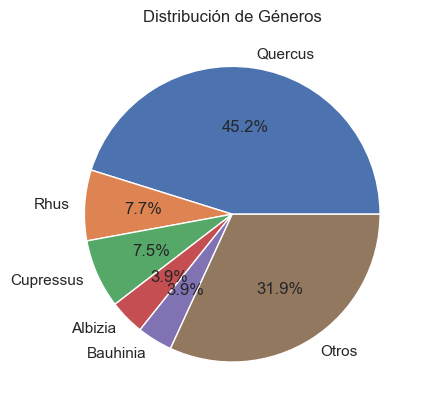

In [174]:
# count_sp_veg = df['Especie Vegetal '].str.split(' ').str[0].value_counts()
# creacion de la grafica de pastel
top_5 = count_sp_veg.iloc[:5]
otros = pd.DataFrame({'Género': 'otros', 'Conteo': [count_sp_veg.iloc[5:]['Conteo'].sum()]})
new_df = pd.concat([top_5, otros])

# Creamos una nueva columna que refleje la agrupación de los datos
new_df['agrupacion'] = new_df['Género']
new_df.loc[new_df['Género'].isin(top_5['Género'].tolist()) == False, 'agrupacion'] = 'Otros'
# Creamos la gráfica de pastel utilizando la nueva columna agrupacion
plt.pie(new_df['Conteo'], labels=new_df['agrupacion'], autopct='%1.1f%%')
plt.title('Distribución de Géneros')
plt.show()

Index(['Sp Entomológica ', 'Conteo'], dtype='object')


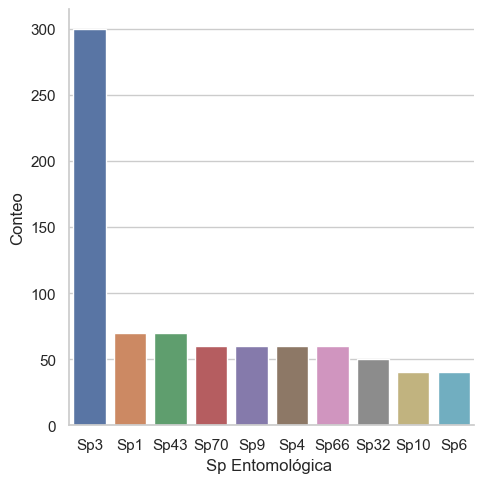

In [175]:
especies_cerca_quercus = pd.DataFrame(df.loc[df['Especie Vegetal '].str.startswith('Quercus'), 'Sp Entomológica ']).value_counts().reset_index()
especies_cerca_quercus = especies_cerca_quercus.rename(columns={0: 'Conteo'})
print(especies_cerca_quercus.columns)
sns.catplot(x='Sp Entomológica ', y='Conteo', data=especies_cerca_quercus.head(10), kind='bar')

In [176]:
df_sustratos = df.loc[df['Sp Entomológica '] == 'Sp3', [ 'Suelo', 'Hojas', 'Hojas Ramas', 'Fruto', 'Tallo Ramas', 'Tallo Hojas',
       'Vuelo', 'Vuelo Hojas', 'Vegetacion Aledaña', 'Flor Fruto',
       'Vegetacion Tallo', 'Flor', 'Tronco', 'Vuelo Fruto',
       'Vuelo Vegetacion ']]

In [177]:
df_sustratos.columns

Index(['Suelo', 'Hojas', 'Hojas Ramas', 'Fruto', 'Tallo Ramas', 'Tallo Hojas',
       'Vuelo', 'Vuelo Hojas', 'Vegetacion Aledaña', 'Flor Fruto',
       'Vegetacion Tallo', 'Flor', 'Tronco', 'Vuelo Fruto',
       'Vuelo Vegetacion '],
      dtype='object')

In [178]:
df_sustratos = pd.get_dummies(df_sustratos)
df_sustratos['No. Individuos'] = df.loc[df['Sp Entomológica '] == 'Sp3', 'No. Individuos ']

In [179]:
df_sustratos['No. Individuos'] = df_sustratos['No. Individuos'].fillna(0)
for col in df_sustratos.columns.tolist():
    if col != 'No. Individuos':
        df_sustratos[col] = df_sustratos[col] * df_sustratos['No. Individuos']
df_sustratos

,Suelo_si,Hojas_si,Hojas Ramas_si,Tallo Ramas_si,Vegetacion Aledaña_si,Vegetacion Tallo_si,No. Individuos
2869,0.0,10.0,0.0,0.0,0.0,0.0,10.0
2868,0.0,0.0,0.0,0.0,12.0,0.0,12.0
2863,0.0,0.0,0.0,0.0,10.0,0.0,10.0
2864,0.0,0.0,0.0,10.0,0.0,0.0,10.0
2865,0.0,5.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...
3785,0.0,0.0,0.0,0.0,2.0,0.0,2.0
1169,0.0,0.0,0.0,0.0,2.0,0.0,2.0
6401,0.0,0.0,0.0,0.0,2.0,0.0,2.0
3131,0.0,0.0,0.0,0.0,2.0,0.0,2.0


In [180]:
plaga = pd.DataFrame(df_sustratos.sum()).reset_index()
plaga = plaga.rename(columns={0: 'num', 'index': 'sutrato'})
plaga

,sutrato,num
0,Suelo_si,280.0
1,Hojas_si,490.0
2,Hojas Ramas_si,20.0
3,Tallo Ramas_si,420.0
4,Vegetacion Aledaña_si,1940.0
5,Vegetacion Tallo_si,300.0
6,No. Individuos,3830.0


In [181]:
plaga['porcentaje'] = plaga['num'] * 100 / 3830

In [182]:
plaga

,sutrato,num,porcentaje
0,Suelo_si,280.0,7.310705
1,Hojas_si,490.0,12.793734
2,Hojas Ramas_si,20.0,0.522193
3,Tallo Ramas_si,420.0,10.966057
4,Vegetacion Aledaña_si,1940.0,50.652742
5,Vegetacion Tallo_si,300.0,7.832898
6,No. Individuos,3830.0,100.000000
